In [1]:
install.packages("babynames",  repos = "http://cran.us.r-project.org")
install.packages("mdsr")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘AsioHeaders’, ‘websocket’, ‘svglite’, ‘plogr’, ‘chromote’, ‘downloader’, ‘kableExtra’, ‘RMariaDB’, ‘skimr’, ‘webshot2’




# --- DATA EXTRACTION and TRANSFORMATION ---

In [16]:
library(tidyverse)
library(mdsr)
library(dplyr)

url <- "https://raw.githubusercontent.com/mosomo82/COMP_SCI_5530/refs/heads/main/Assignment/Assignment_2%263/Q2_Diabetes/raw_data/diabetes.csv"
data <- read.csv(url)

print("--- Original Data Loaded ---")
glimpse(data)

summary(data$Glucose)

# Check for zero value or NAs
columns_to_impute <- c('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI')

# Replace 0 with NaN since 0 is biologically impossible for a person
clean_data <- data
clean_data[columns_to_impute][clean_data[columns_to_impute] == 0] <- NaN

head(clean_data)

# Calculate the medians ignoring NAs
medians <- sapply(clean_data[columns_to_impute], median, na.rm = TRUE)

# Fill the NA values with calculated medians
for (col in columns_to_impute) {
  clean_data[col][is.na(clean_data[col])] <- medians[col]
}

write_csv(clean_data, "clean_data.csv")

print("--- Final Cleaned Data (after imputation) ---")
glimpse(clean_data)

[1] "--- Original Data Loaded ---"
Rows: 768
Columns: 9
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, …
$ Glucose                  <int> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125…
$ BloodPressure            <int> 72, 66, 64, 66, 40, 74, 50, 0, 70, 96, 92, 74…
$ SkinThickness            <int> 35, 29, 0, 23, 35, 0, 32, 0, 45, 0, 0, 0, 0, …
$ Insulin                  <int> 0, 0, 0, 94, 168, 0, 88, 0, 543, 0, 0, 0, 0, …
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.…
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2…
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 3…
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, …


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    99.0   117.0   120.9   140.2   199.0 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,NaN,33.6,0.627,50,1
2,1,85,66,29,NaN,26.6,0.351,31,0
3,8,183,64,NaN,NaN,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,NaN,NaN,25.6,0.201,30,0


[1] "--- Final Cleaned Data (after imputation) ---"
Rows: 768
Columns: 9
$ Pregnancies              <int> 6, 1, 8, 1, 0, 5, 3, 10, 2, 8, 4, 10, 10, 1, …
$ Glucose                  <dbl> 148, 85, 183, 89, 137, 116, 78, 115, 197, 125…
$ BloodPressure            <dbl> 72, 66, 64, 66, 40, 74, 50, 72, 70, 96, 92, 7…
$ SkinThickness            <dbl> 35, 29, 29, 23, 35, 29, 32, 29, 45, 29, 29, 2…
$ Insulin                  <dbl> 125, 125, 125, 94, 168, 125, 88, 125, 543, 12…
$ BMI                      <dbl> 33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.…
$ DiabetesPedigreeFunction <dbl> 0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2…
$ Age                      <int> 50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 30, 3…
$ Outcome                  <int> 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, …


# --- a. Glucose Analysis ---


── Variable type: numeric ──────────────────────────────────────────────────────
  var      n na mean   sd p0 p25 p50 p75 p100
1 Glucose 25  0  117 35.9 68  92 100 137  189

── Variable type: numeric ──────────────────────────────────────────────────────
  var       n na mean   sd p0  p25 p50  p75 p100
1 Glucose 768  0 122. 30.4 44 99.8 117 140.  199
[1] " ---A Sample of Mean and Max from Boothstrap "


,sample_mean_glucose_bs,sample_max_glucose_bs,n
,<dbl>,<dbl>,<dbl>
1,114.64,148,25
2,120.72,186,25
3,122.84,194,25
4,124.92,187,25
5,121.68,191,25
6,119.16,197,25


[1] " --- An Average Mean and Average Max from Boothstrap"
  avg_mean avg_max
1 121.5806 185.914


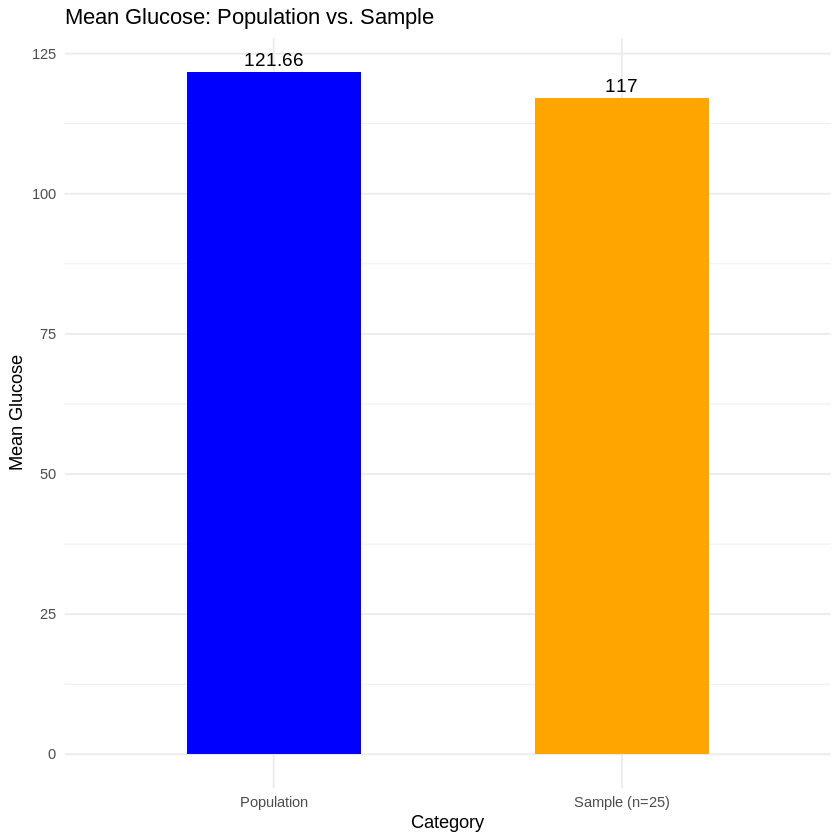

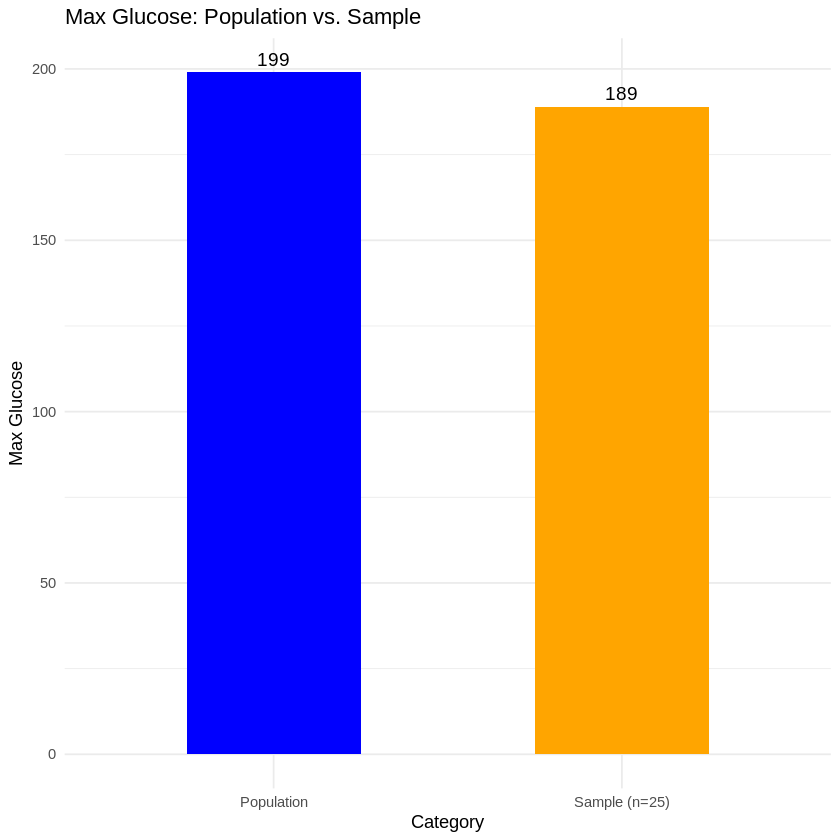

In [17]:
set.seed(101)

n = 25

glu_data <- clean_data %>%
  select('Glucose')

glu_data_25 <- glu_data %>%
  slice_sample(n = n)

print(glu_data_25 %>%
  skim())

print(clean_data %>%
  select('Glucose') %>%
  skim())

sample_summary <- glu_data_25 %>%
  summarise(sample_mean_glucose = mean(Glucose),
            sample_max_glucose = max(Glucose)
  )

population_summary <- clean_data %>%
  summarise(population_mean_glucose = mean(Glucose),
            population_max_glucose = max(Glucose)
  )

sample_mean_glucose <- sample_summary$sample_mean_glucose
sample_max_glucose <- sample_summary$sample_max_glucose
population_mean_glucose <- population_summary$population_mean_glucose
population_max_glucose <- population_summary$population_max_glucose

# --- Using boothstrap with 500 samples and 25 observation
num_trials <- 500

glu_data_25_means_maxs <- 1:num_trials %>%
  map_dfr(
    ~ clean_data %>%
      slice_sample(n = n, replace = TRUE) %>%
      summarize(sample_mean_glucose_bs = mean(Glucose),
                sample_max_glucose_bs = max(Glucose)
      ) %>%
  mutate (n = n)
  )

print(" ---A Sample of Mean and Max from Boothstrap--- ")
head(glu_data_25_means_maxs)

avg_glu_data_25_means_maxs <- glu_data_25_means_maxs %>%
  summarise(
    avg_mean = mean(sample_mean_glucose_bs),
    avg_max = mean(sample_max_glucose_bs)
  )

print(" --- An Average Mean and Average Max from Boothstrap")
print(avg_glu_data_25_means_maxs)


# Chart 1: Mean Glucose comparison without boothstrap
mean_data_df <- data.frame(
  Category = c("Population", "Sample (n=25)"),
  MeanGlucose = c(population_mean_glucose, sample_mean_glucose)
)

print(ggplot(mean_data_df, aes(x = Category, y = MeanGlucose, fill = Category)) +
  geom_bar(stat = "identity", width = 0.5) +
  geom_text(aes(label = round(MeanGlucose, 2)), vjust = -0.5, size = 4) +
  labs(title = "Mean Glucose: Population vs. Sample",
       y = "Mean Glucose") +
  scale_fill_manual(values = c("blue", "orange")) +
  theme_minimal() +
  theme(legend.position = "none"))

# Chart 2: Max Glucose comparison without boothstrap
max_data_df <- data.frame(
  Category = c("Population", "Sample (n=25)"),
  MaxGlucose = c(population_max_glucose, sample_max_glucose)
)

print(ggplot(max_data_df, aes(x = Category, y = MaxGlucose, fill = Category)) +
  geom_bar(stat = "identity", width = 0.5) +
  geom_text(aes(label = round(MaxGlucose, 0)), vjust = -0.5, size = 4) +
  labs(title = "Max Glucose: Population vs. Sample",
       y = "Max Glucose") +
  scale_fill_manual(values = c("blue", "orange")) +
  theme_minimal() +
  theme(legend.position = "none"))

## --- b. Find the BMI 98th Percentile from Sample and Population

sample_q98
<dbl>
43.012


population_q98
<dbl>
47.526


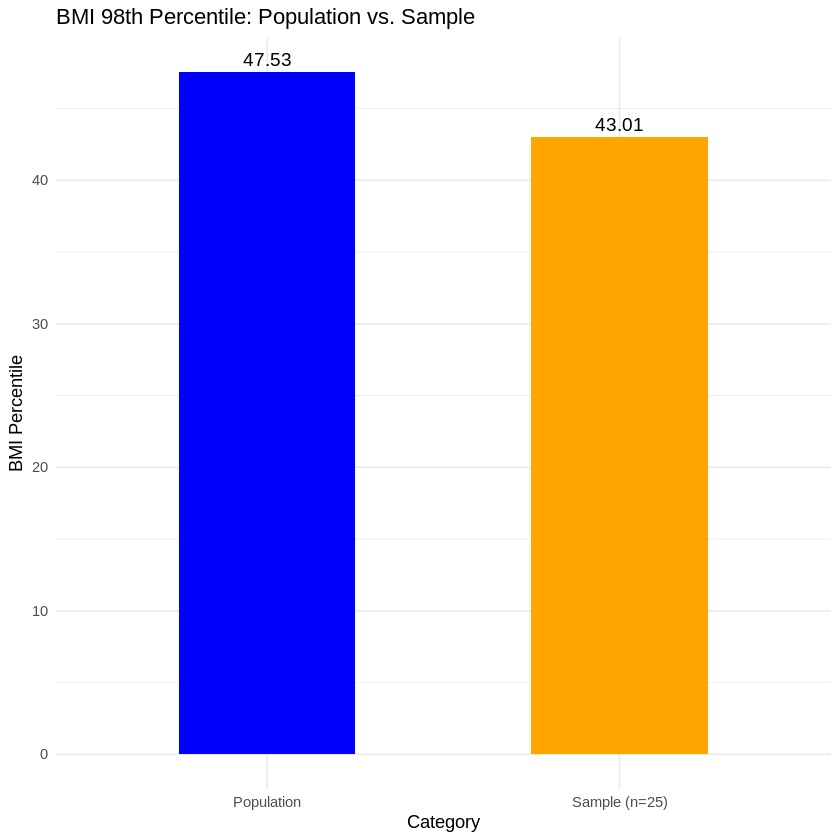

In [13]:
set.seed (101)

bmi_data <- clean_data %>%
  select('BMI')

bmi_data_25 <- bmi_data %>%
  slice_sample (n = n)

sample_bmi_q98 <- bmi_data_25 %>%
  summarize(sample_q98 = quantile(BMI, p = 0.98))
sample_bmi_q98

population_bmi_q98 <- bmi_data %>%
  summarize(population_q98 = quantile(BMI, p = 0.98))
population_bmi_q98

sample_bmi_q98 = sample_bmi_q98$sample_q98
population_bmi_q98 = population_bmi_q98$population_q98

# Create a comparision chart for BMI Q98 between sample and population
bmi_data_df <- data.frame(
  Category = c("Population", "Sample (n=25)"),
  BMIQ98 = c(population_bmi_q98, sample_bmi_q98)
)

print(ggplot(bmi_data_df, aes( x = Category, y = BMIQ98, fill = Category)) +
  geom_bar(stat = "identity", width = 0.5) +
  geom_text(aes(label = round(BMIQ98,2)), vjust = -0.5, size = 4) +
  labs (title = "BMI 98th Percentile: Population vs. Sample",
       y = "BMI Percentile") +
  scale_fill_manual(values = c("blue", "orange")) +
  theme_minimal() +
  theme(legend.position = "none")
)





# --- BloodPressure Statistics between Sample and Population

In [22]:
set.seed(101)
numb_trials <- 500
sample_size <- 150

bloodpressure_data <- clean_data %>%
  select("BloodPressure")


bloodpressure_data_150 <- clean_data %>%
  slice_sample(n = sample_size, replace = TRUE) %>%
  select("BloodPressure")

print(bloodpressure_data %>%
  select("BloodPressure") %>%
    skim(BloodPressure)
)

# Find the average mean, standard deviation, and percentile for sammple
bloodpressure_150_data <- 1: numb_trials %>%
  map_dfr(
    ~ clean_data %>%
      slice_sample (n = sample_size, replace = TRUE) %>%
      skim(BloodPressure
      ) %>%
  mutate(n = sample_size)
  )

print(head(bloodpressure_150_data))



# Calculate the averages for mean, sd, and all percentiles
avg_sample <- bloodpressure_150_data %>%
  summarise(
    avg_mean = mean(mean),
    avg_std   = mean(sd),
    avg_p0   = mean(p0),    # Average of the minimums
    avg_p25  = mean(p25),   # Average of the 25th percentiles
    avg_p50  = mean(p50),   # Average of the medians
    avg_p75  = mean(p75),   # Average of the 75th percentiles
    avg_p100 = mean(p100)   # Average of the maximums
  )

print("\n--- An average of boothstrap sample distribution---\n")
avg_sample_long <- avg_sample %>%
  pivot_longer(
    cols = everything(),
    names_to = "Statistic",
    values_to = "Value"
  ) %>%
  mutate(Value = round(Value,2))

print(avg_sample_long)


── Variable type: numeric ──────────────────────────────────────────────────────
  var             n na mean   sd p0 p25 p50 p75 p100
1 BloodPressure 768  0 72.4 12.1 24  64  72  80  122

── Variable type: numeric ──────────────────────────────────────────────────────
  var             n na mean   sd p0  p25 p50  p75 p100
1 BloodPressure 150  0 71.1 11.5 38 65.2  72 78    106
2 BloodPressure 150  0 72.9 11.2 46 66.5  72 80    106
3 BloodPressure 150  0 71.1 13.1 24 64    71 78    122
4 BloodPressure 150  0 72.4 11.7 38 64    72 80    100
5 BloodPressure 150  0 72.4 11.1 24 66    72 78    122
6 BloodPressure 150  0 70.1 11.6 38 62.5  70 75.8  122
[1] "\n--- An average of boothstrap sample distribution---\n"
# A tibble: 7 × 2
  Statistic Value
  <chr>     <dbl>
1 avg_mean   72.4
2 avg_std    12.0
3 avg_p0     35.6
4 avg_p25    64.6
5 avg_p50    72.1
6 avg_p75    79.6
7 avg_p100  111. 


# --- Create a comparison charts between sample and population ---

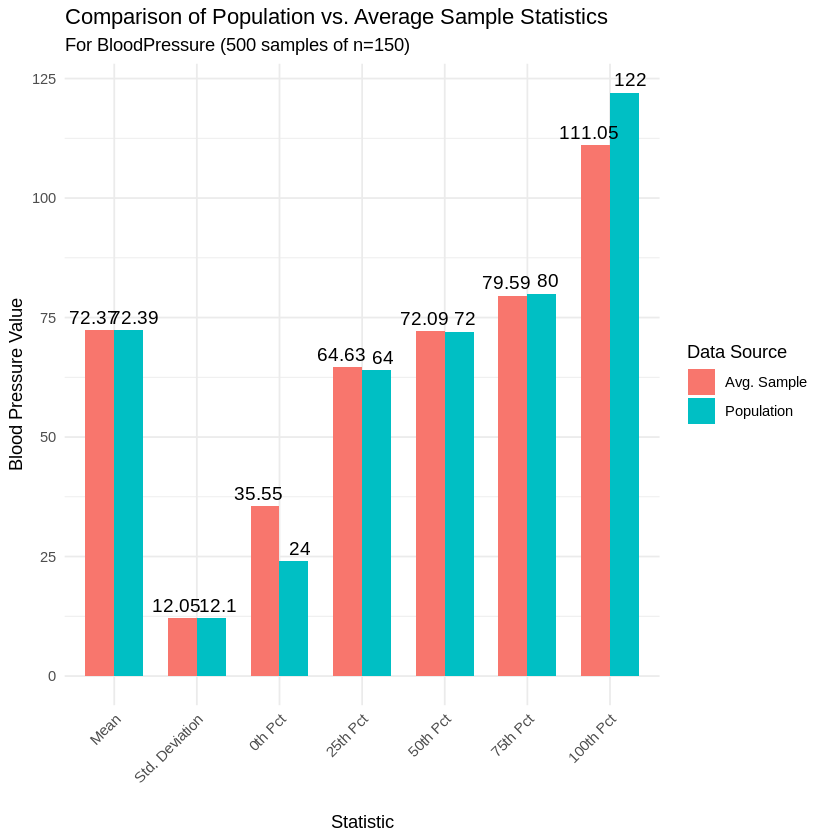

In [24]:
library(ggplot2)

# --- 1. Create the Data Frame for Plotting ---
# We need to put the data into a 'long' format for ggplot2
# We will use the values calculated from the Python script.

# Define the statistics
avg_pop <- bloodpressure_data %>%
  summarise(
  pop_mean = mean(BloodPressure),
  pop_std = sd(BloodPressure),
  pop_p0 = min(BloodPressure),
  pop_p25 = quantile(BloodPressure, probs = 0.25),
  pop_p50 = median(BloodPressure),
  pop_p75 = quantile(BloodPressure, probs = 0.75),
  pop_p100 = max(BloodPressure)
  )

# Create the data frame (tibble)
plot_data <- tibble(
  # Use factor() to control the order of statistics on the x-axis
  Statistic = factor(
    rep(c("Mean", "Std. Deviation", "0th Pct", "25th Pct", "50th Pct", "75th Pct", "100th Pct"), 2),
    levels = c("Mean", "Std. Deviation", "0th Pct", "25th Pct", "50th Pct", "75th Pct", "100th Pct")
  ),
  Type = c(
    rep("Population", 7),
    rep("Avg. Sample", 7)
  ),
  Value = c(
    avg_pop$pop_mean, avg_pop$pop_std, avg_pop$pop_p0, avg_pop$pop_p25, avg_pop$pop_p50, avg_pop$pop_p75, avg_pop$pop_p100,
    avg_sample$avg_mean, avg_sample$avg_std, avg_sample$avg_p0, avg_sample$avg_p25, avg_sample$avg_p50, avg_sample$avg_p75, avg_sample$avg_p100
  )
)

# --- 2. Create the Grouped Bar Chart ---

ggplot(plot_data, aes(x = Statistic, y = Value, fill = Type)) +
  geom_col(position = position_dodge(width = .7), width = .7) +
  geom_text(aes(label = round(Value, 2)), vjust = -0.5, size = 4, position = position_dodge(width = 1)) +
  # --- 3. Add Labels and Formatting ---
  labs(
    title = "Comparison of Population vs. Average Sample Statistics",
    subtitle = "For BloodPressure (500 samples of n=150)",
    x = "Statistic",
    y = "Blood Pressure Value",
    fill = "Data Source" # Changes the legend title
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1) # Angle labels if they overlap
  )

# Save the plot
ggsave("comparison_plot.png", width = 8, height = 6)